In [1]:
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # to enhance readability and ignore the error
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(18,6)# it is the default figure size
#ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#  Reading dataset

In [3]:
df=pd.read_csv("C:\\Users\\adity\\Desktop\\BGMI Game Dataset.csv")

In [4]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  kill

In [9]:
df.shape

(4446966, 29)

In [10]:
df['winPlacePerc']

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446966, dtype: float64

In [11]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [12]:
df.drop(2744604,inplace=True)# beacuse we have just one data that with no value so we dropped that 

In [13]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [14]:
df['playerJoined']=df.groupby('matchId')['matchId'].transform('count') #

In [15]:
a=df['playerJoined']

In [16]:
a.isnull().sum()

0

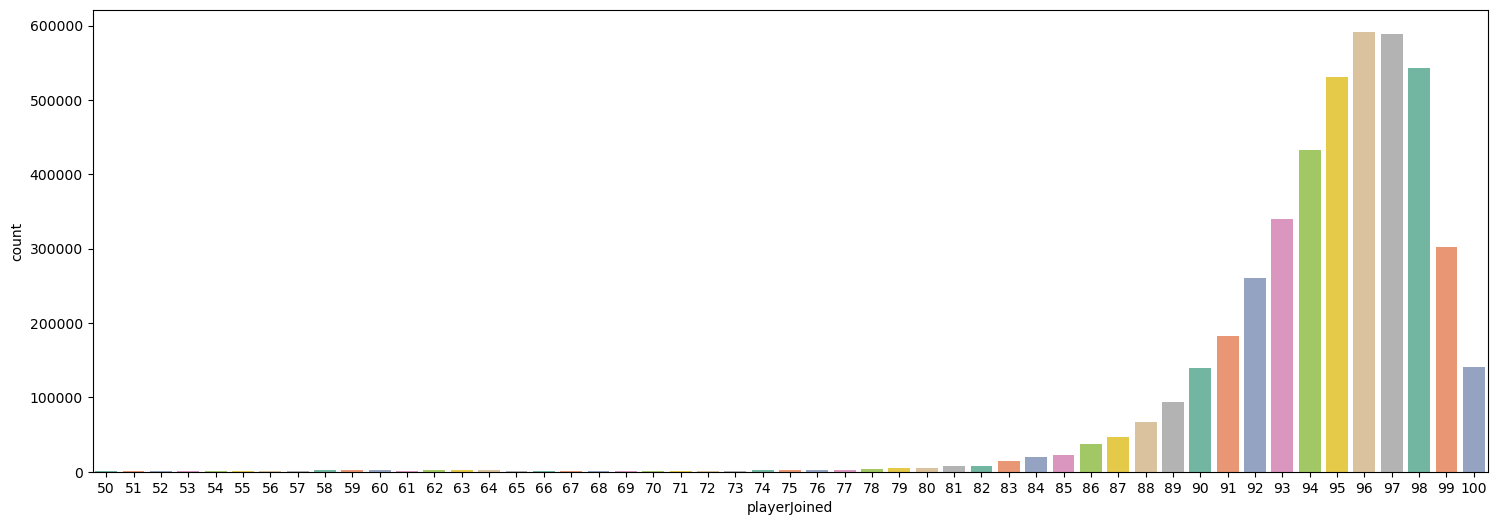

In [17]:
sns.countplot(df[df['playerJoined']>=50], x='playerJoined', palette='Set2')
plt.show()
# filtered dataset with only where people more than 50 were joined to play

# analysis

# analyzing by kiils

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [19]:
df['totaldistance']=df['rideDistance']+df['swimDistance']+df['walkDistance']
# total distance covered by the player

In [20]:
df['killsswithoutmove']=((df['kills']>0) & (df['totaldistance']==0))


df.drop(df[df['killsswithoutmove'] ==True].index,inplace=True)
#dropping all the kiilss without ,movng to any place

In [21]:
df.drop(df[df['roadKills']>5].index,inplace=True)
#dropping all the roadkills greater than 5

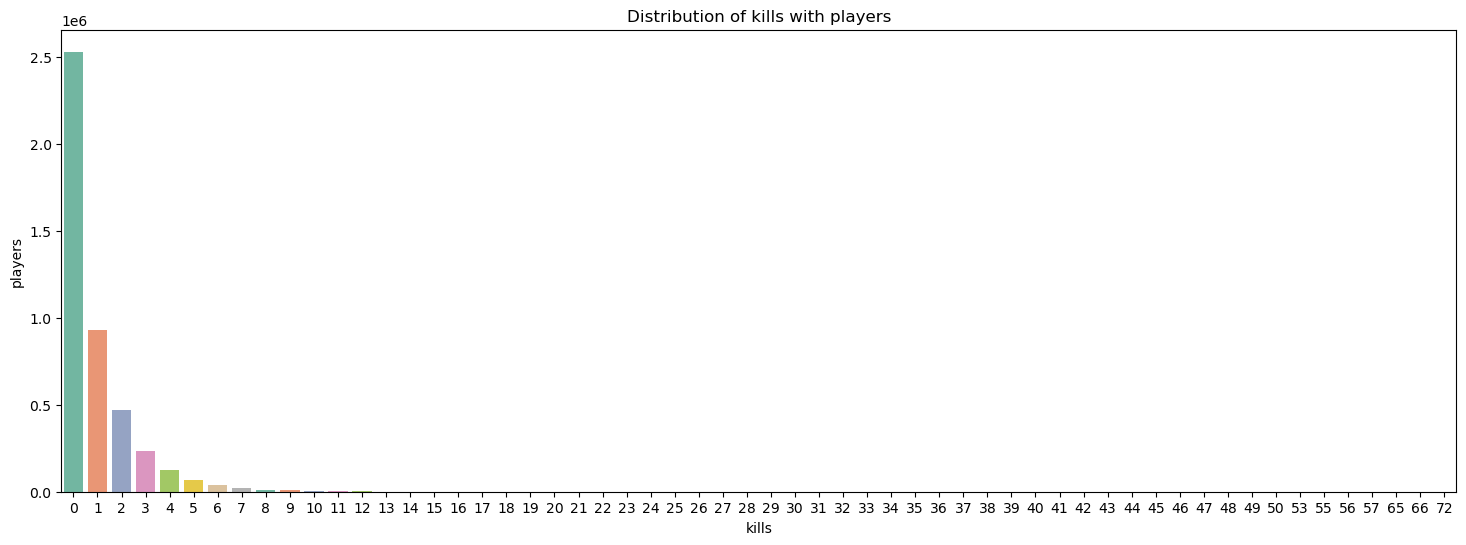

In [22]:
sns.countplot(x=df['kills'],data=df,palette='Set2')
plt.title("Distribution of kills with players")
plt.xlabel("kills");
plt.ylabel("players")
plt.show()

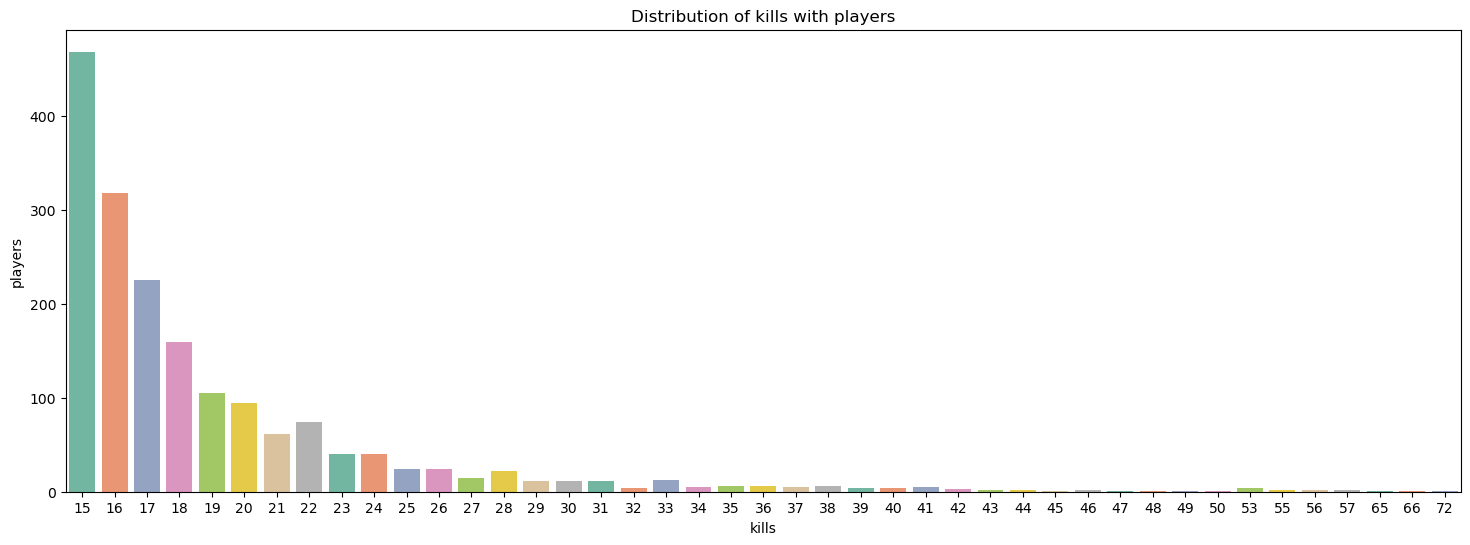

In [23]:
sns.countplot(df[df['kills']>=15],x='kills',palette="Set2")
plt.title("Distribution of kills with players")
plt.xlabel("kills");
plt.ylabel("players")
plt.show()

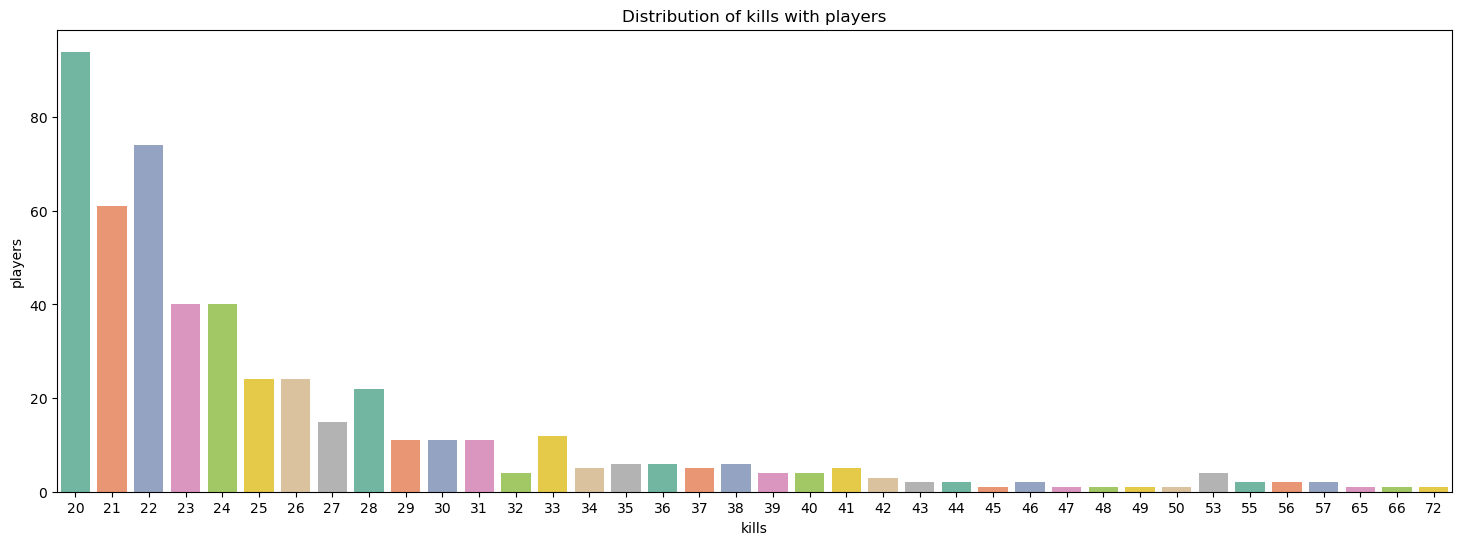

In [24]:
sns.countplot(df[df['kills']>=20],x='kills',palette="Set2")
plt.title("Distribution of kills with players")
plt.xlabel("kills");
plt.ylabel("players")
plt.show()

In [25]:
df[df['kills']>20].shape

(417, 32)

In [26]:
#droping the kill rate of more than 20 ncoz it is rare
df.drop(df[df['kills']>20].index,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4444967 entries, 0 to 4446965
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance      

In [28]:
l=df['headshotKills']

In [29]:
l.isnull().sum()

0

In [30]:
df['headshot']=df['headshotKills']/df['kills']

In [31]:
df['headshot']=df['headshot'].fillna(0)

<Axes: xlabel='headshot', ylabel='Density'>

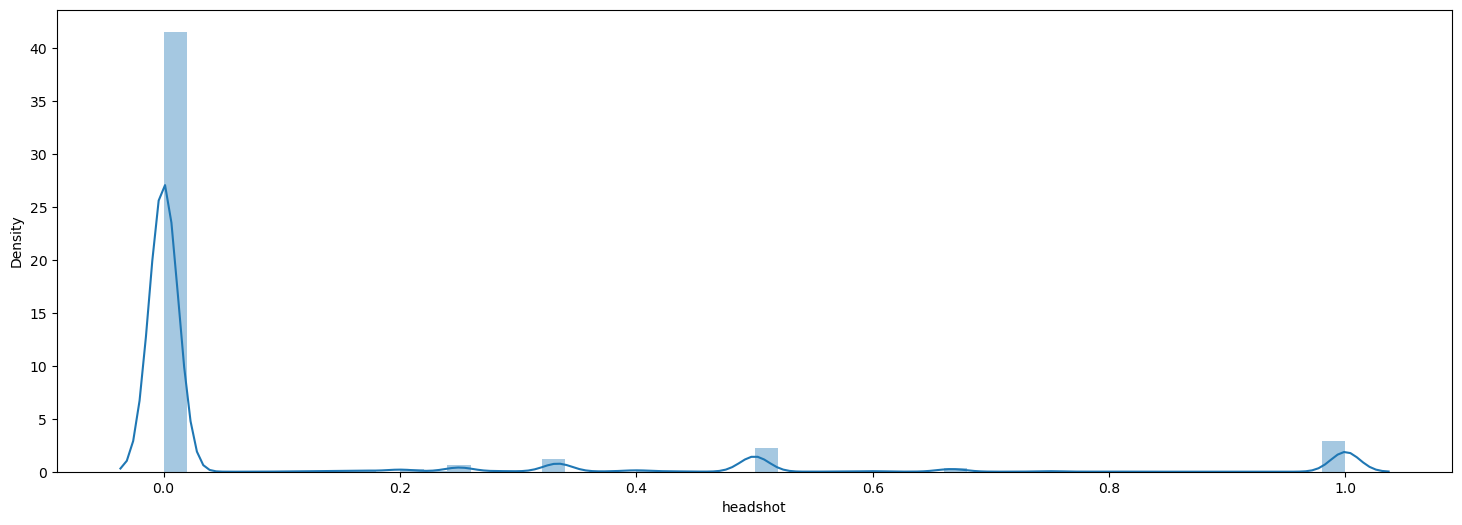

In [32]:
sns.distplot(df['headshot'])

<Axes: ylabel='headshot'>

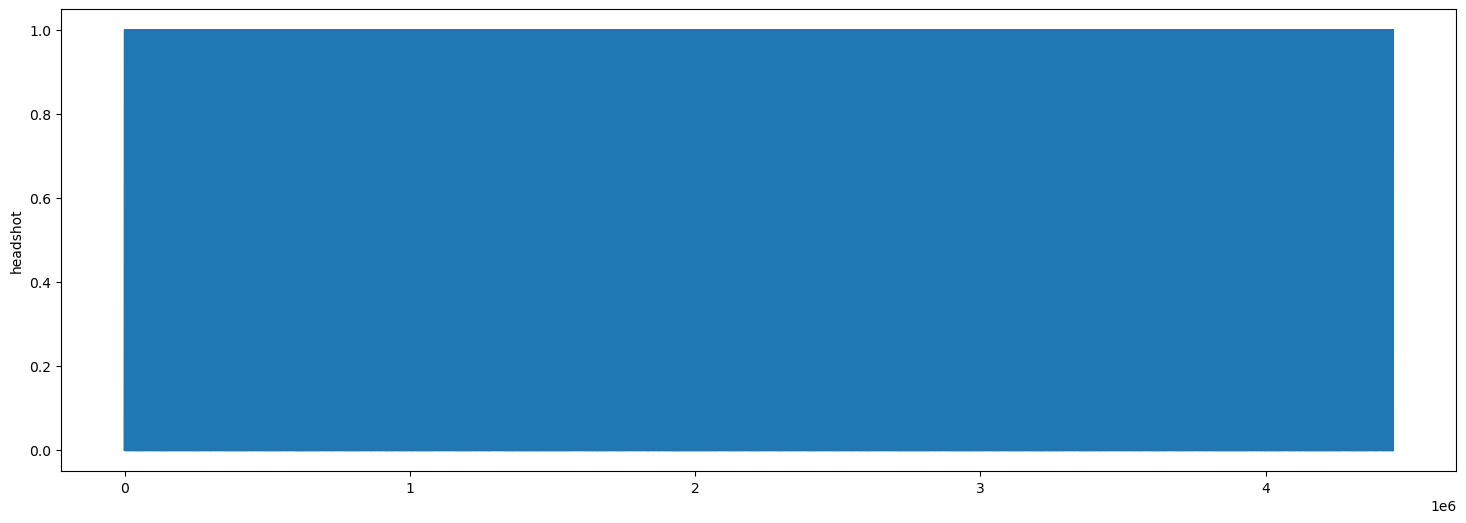

In [33]:
sns.lineplot(df['headshot'])

<Axes: xlabel='headshot', ylabel='Count'>

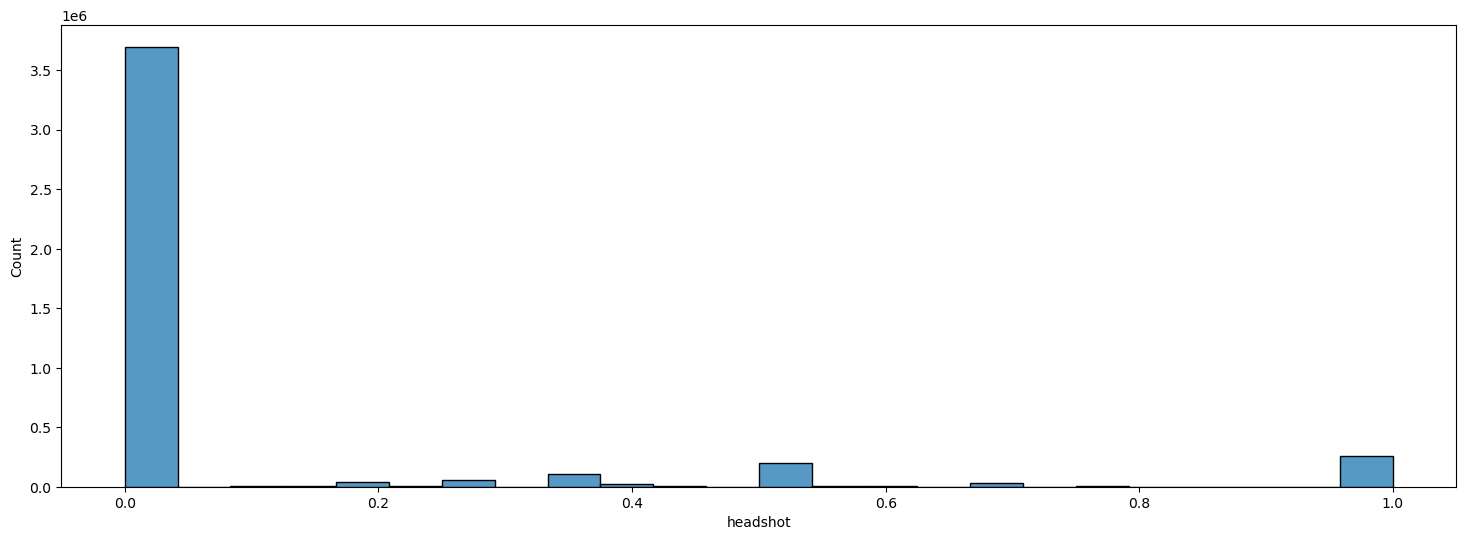

In [34]:
sns.histplot(df['headshot'])

In [35]:
no=df[(df['headshot']==1) & (df['kills']>5)].shape

In [36]:
no

(187, 33)

In [37]:
df.drop(df[(df['headshot']==1)&(df['kills']>5)].index,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4444780 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance      

<Axes: xlabel='longestKill', ylabel='Density'>

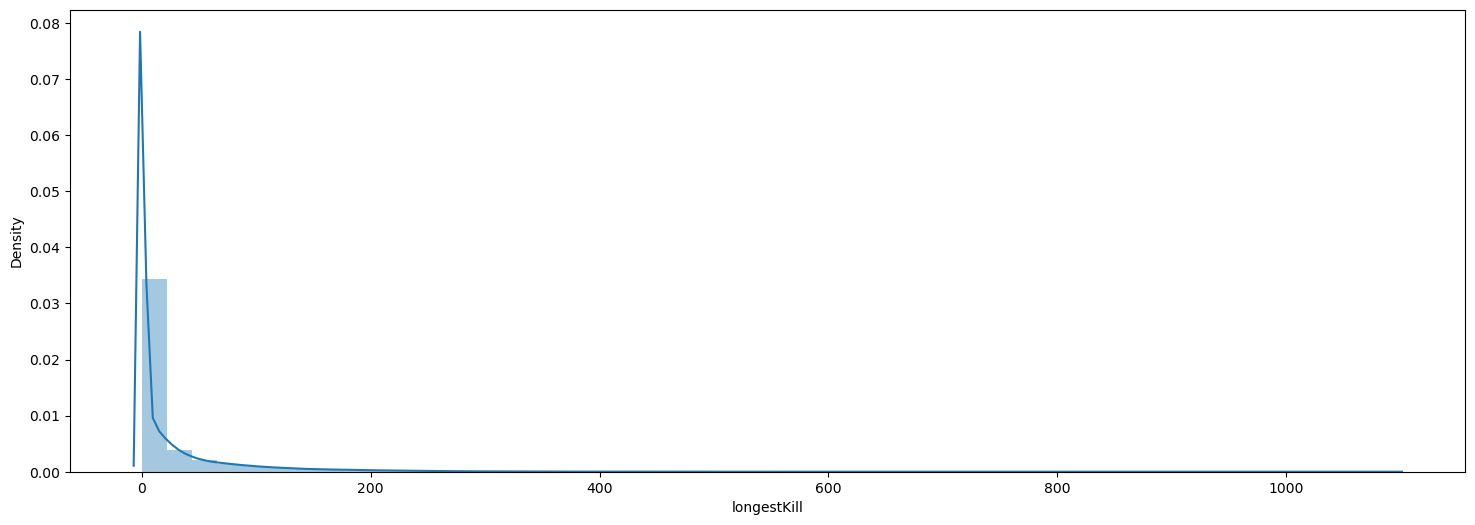

In [39]:
sns.distplot(df['longestKill'])

In [40]:
df[df['longestKill']>500].shape

(1736, 33)

In [41]:
df.drop(df[df['longestKill']>500 v].index,inplace=True)

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

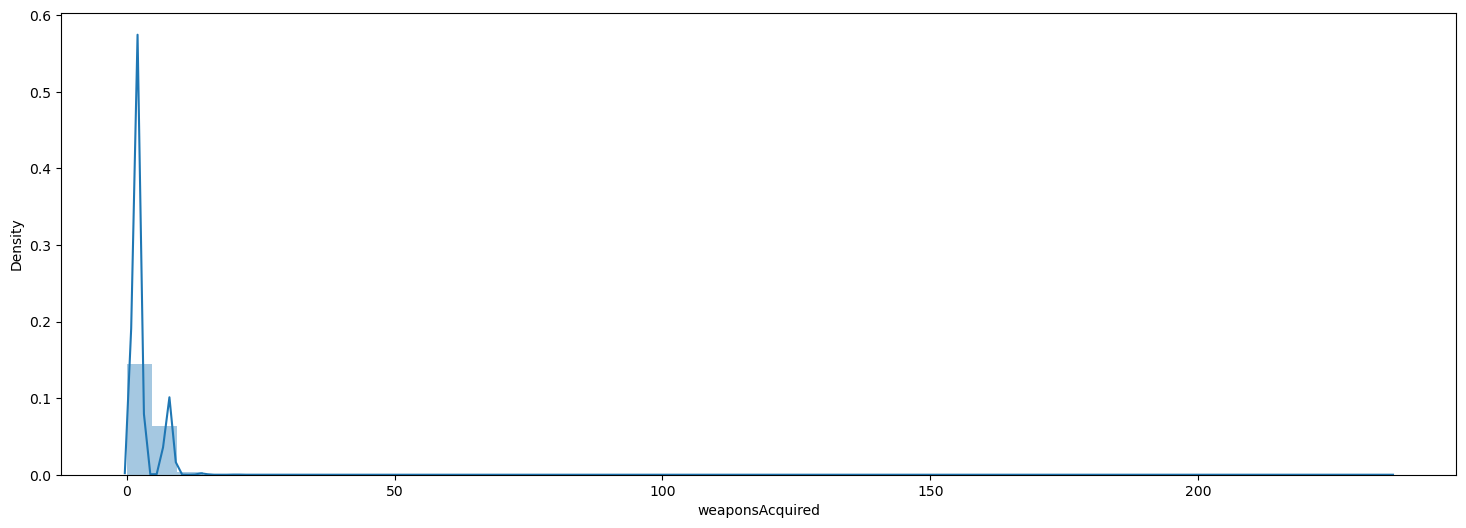

In [42]:
sns.distplot(df['weaponsAcquired'])

In [43]:
df[df['weaponsAcquired']>20].shape

(2500, 33)

In [44]:
df.drop(df[df['weaponsAcquired']>20].index,inplace=True)

In [45]:
df.shape

(4440544, 33)

In [46]:
df.isnull().sum()

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
matchType            0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         0
playerJoined         0
totaldistance        0
killsswithoutmove    0
headshot             0
dtype: int64

In [47]:
## data correlation
cor=df.corr(numeric_only=True)

In [48]:
cor

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killsswithoutmove,headshot
assists,1.000000,0.315878,0.389300,0.296742,0.184291,0.228783,-0.290482,0.039996,0.297945,0.238509,...,0.003889,0.059215,0.298273,0.211808,0.023781,0.303540,-0.021455,0.239744,NaN,0.099445
boosts,0.315878,1.000000,0.537090,0.364647,0.344240,0.537125,-0.555590,0.008233,0.519160,0.407249,...,0.013376,0.087263,0.640186,0.432968,-0.007684,0.634725,-0.015665,0.574190,NaN,0.183871
damageDealt,0.389300,0.537090,1.000000,0.746103,0.602416,0.346821,-0.688568,0.051227,0.883382,0.708666,...,0.012947,0.083161,0.410203,0.325096,0.017224,0.448700,-0.026001,0.321800,NaN,0.302603
DBNOs,0.296742,0.364647,0.746103,1.000000,0.471019,0.267893,-0.561839,0.043226,0.720719,0.653479,...,0.070318,0.060657,0.288997,0.216040,0.010815,0.282773,0.000852,0.227751,NaN,0.248514
headshotKills,0.184291,0.344240,0.602416,0.471019,1.000000,0.202367,-0.478398,0.024558,0.666250,0.515027,...,0.007126,0.039834,0.258422,0.198021,0.004277,0.282322,-0.009745,0.193771,NaN,0.749826
heals,0.228783,0.537125,0.346821,0.267893,0.202367,1.000000,-0.385989,-0.002632,0.315465,0.270193,...,0.035089,0.063065,0.431497,0.318461,-0.011201,0.428468,-0.015703,0.439714,NaN,0.122098
killPlace,-0.290482,-0.555590,-0.688568,-0.561839,-0.478398,-0.385989,1.000000,-0.023298,-0.746064,-0.811485,...,-0.037419,-0.073507,-0.591046,-0.507754,-0.002250,-0.719399,0.116603,-0.483760,NaN,-0.386750
killPoints,0.039996,0.008233,0.051227,0.043226,0.024558,-0.002632,-0.023298,1.000000,0.037419,0.037205,...,-0.039817,-0.009697,0.004460,-0.003746,0.983445,0.012880,0.051215,-0.017853,NaN,0.014759
kills,0.297945,0.519160,0.883382,0.720719,0.666250,0.315465,-0.746064,0.037419,1.000000,0.812887,...,0.015134,0.082253,0.388211,0.304132,0.006178,0.429035,-0.011022,0.291919,NaN,0.329703
killStreaks,0.238509,0.407249,0.708666,0.653479,0.515027,0.270193,-0.811485,0.037205,0.812887,1.000000,...,0.026768,0.064403,0.329248,0.274381,0.008229,0.377707,0.008136,0.246475,NaN,0.398178


<Axes: >

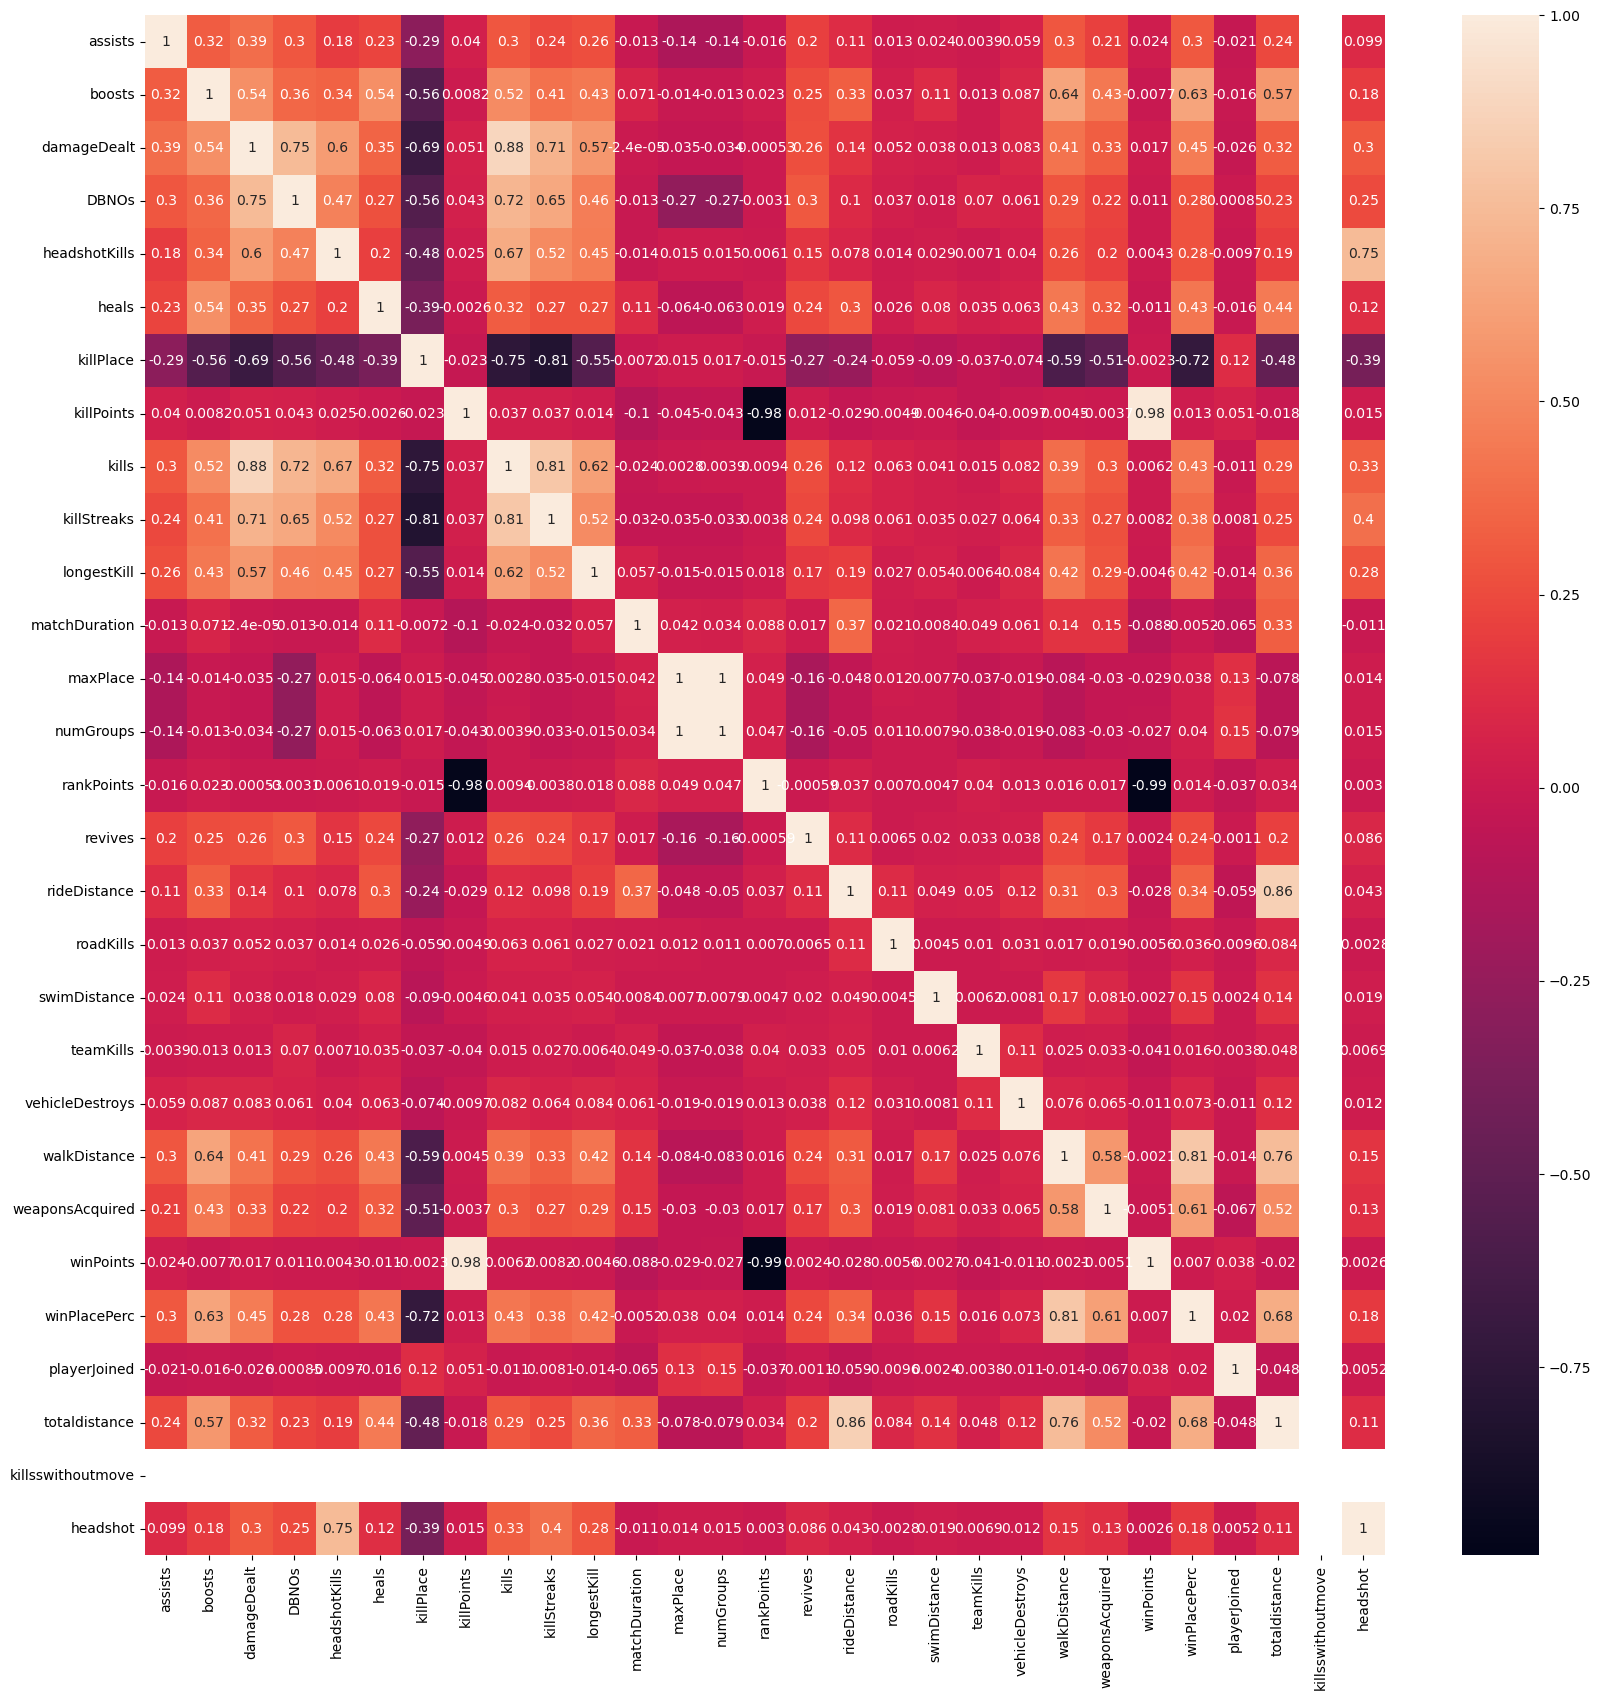

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)

In [50]:
data = df.drop(columns = ['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance','heals',
         'revives','kills','damageDealt','maxPlace','matchDuration'])


In [51]:
data

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killsswithoutmove,headshot
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,0,0,1,1466,0.4444,96,244.8000,False,0.0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0,0,5,0,0.6400,91,1445.0445,False,0.0
2,0,0,47,0,0,0.00,duo,47,1491,0,0,0,2,0,0.7755,98,161.8000,False,0.0
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0,0,3,0,0.1667,91,202.7000,False,0.0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,0,0,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,0,0,3,1507,0.1786,94,2311.0000,False,0.0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,0,0,6,0,0.2935,93,81.7000,False,0.0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,0,0,4,0,0.4815,98,790.8840,False,0.0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,0,0,8,0,0.8000,94,2748.0000,False,0.5


In [52]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killsswithoutmove,headshot
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.00,3,1507,0.1786,94,2311.0000,False,0.0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.70,6,0,0.2935,93,81.7000,False,0.0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.70,4,0,0.4815,98,790.8840,False,0.0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.00,8,0,0.8000,94,2748.0000,False,0.5


In [53]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killsswithoutmove,headshot
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,0,0,1,1466,0.4444,96,244.8000,False,0.0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0,0,5,0,0.6400,91,1445.0445,False,0.0
2,0,0,47,0,0,0.00,duo,47,1491,0,0,0,2,0,0.7755,98,161.8000,False,0.0
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0,0,3,0,0.1667,91,202.7000,False,0.0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,0,0,2,0,0.1875,97,49.7500,False,0.0


In [54]:
normalizing_factor=(100-df['playerJoined']/100)+1

In [55]:
normalizing_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: playerJoined, Length: 4440544, dtype: float64

In [56]:
df['playerJoined']

0          96
1          91
2          98
3          91
4          97
           ..
4446961    94
4446962    93
4446963    98
4446964    94
4446965    98
Name: playerJoined, Length: 4440544, dtype: int64

In [57]:
df['killsNorm'] = df['kills'] * normalizing_factor
df['damageDealtNorm'] = df['damageDealt'] * normalizing_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalizing_factor
df['matchDurationNorm'] = df['matchDuration'] * normalizing_factor

df['travelDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healBoost'] = df['boosts'] + df['heals']
df['assist'] = df['assists'] + df['revives']

In [58]:
df['killsNorm']

0            0.00
1            0.00
2            0.00
3            0.00
4          100.03
            ...  
4446961      0.00
4446962      0.00
4446963      0.00
4446964    200.12
4446965    200.04
Name: killsNorm, Length: 4440544, dtype: float64

# it is a categorical problem so the model used  in this is catboost model 

# model training and testing using catboost model

# handling categorical value

In [75]:
# initialize the feature and target variables
x = data.drop(['winPlacePerc'], axis=1)
y = data['winPlacePerc']

In [60]:
data

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,playerJoined,totaldistance,killsswithoutmove,headshot
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,0,0,1,1466,0.4444,96,244.8000,False,0.0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0,0,5,0,0.6400,91,1445.0445,False,0.0
2,0,0,47,0,0,0.00,duo,47,1491,0,0,0,2,0,0.7755,98,161.8000,False,0.0
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0,0,3,0,0.1667,91,202.7000,False,0.0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,0,0,2,0,0.1875,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,0,0,3,1507,0.1786,94,2311.0000,False,0.0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,0,0,6,0,0.2935,93,81.7000,False,0.0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,0,0,4,0,0.4815,98,790.8840,False,0.0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,0,0,8,0,0.8000,94,2748.0000,False,0.5


In [61]:
x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,playerJoined,totaldistance,killsswithoutmove,headshot
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,0,0,1,1466,96,244.8000,False,0.0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0,0,5,0,91,1445.0445,False,0.0
2,0,0,47,0,0,0.00,duo,47,1491,0,0,0,2,0,98,161.8000,False,0.0
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0,0,3,0,91,202.7000,False,0.0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,0,0,2,0,97,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,74,1029,0,0.00,squad-fpp,28,-1,0,0,0,3,1507,94,2311.0000,False,0.0
4446962,0,0,69,0,0,0.00,solo,93,1501,0,0,0,6,0,93,81.7000,False,0.0
4446963,0,0,66,0,0,0.00,squad-fpp,28,1500,0,0,0,4,0,98,790.8840,False,0.0
4446964,1,1,11,0,1,98.50,squad-fpp,25,1418,0,0,0,8,0,94,2748.0000,False,0.5


In [62]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4440544, dtype: float64

In [77]:
x = pd.get_dummies(x,dtype=int)

In [78]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
x.shape

(4440544, 33)

# splitting data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [81]:
import catboost as cb

In [82]:
# Create CatBoost Pool object for training dataset
train_dataset = cb.Pool(X_train, y_train)

# Create CatBoost Pool object for testing dataset
test_dataset = cb.Pool(X_test, y_test)


In [83]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [84]:
model

In [85]:
# Define the grid of hyperparameters for grid search
grid = {'iterations': [100, 150],       # Number of trees in the ensemble
        'learning_rate': [0.03, 0.1],   # Learning rate for gradient boosting
        'depth': [2, 4, 6, 8]}          # Depth of each tree in the ensemble

# Perform grid search to find the best combination of hyperparameters
model.grid_search(grid, train_dataset)

0:	learn: 0.5483385	test: 0.5480290	best: 0.5480290 (0)	total: 437ms	remaining: 43.2s
1:	learn: 0.5334807	test: 0.5331767	best: 0.5331767 (1)	total: 652ms	remaining: 31.9s
2:	learn: 0.5191286	test: 0.5188268	best: 0.5188268 (2)	total: 900ms	remaining: 29.1s
3:	learn: 0.5052236	test: 0.5049220	best: 0.5049220 (3)	total: 1.1s	remaining: 26.4s
4:	learn: 0.4917685	test: 0.4914671	best: 0.4914671 (4)	total: 1.31s	remaining: 24.9s
5:	learn: 0.4787253	test: 0.4784277	best: 0.4784277 (5)	total: 1.51s	remaining: 23.6s
6:	learn: 0.4661484	test: 0.4658516	best: 0.4658516 (6)	total: 1.71s	remaining: 22.8s
7:	learn: 0.4539497	test: 0.4536570	best: 0.4536570 (7)	total: 1.94s	remaining: 22.3s
8:	learn: 0.4421602	test: 0.4418668	best: 0.4418668 (8)	total: 2.16s	remaining: 21.9s
9:	learn: 0.4307745	test: 0.4304838	best: 0.4304838 (9)	total: 2.4s	remaining: 21.6s
10:	learn: 0.4197574	test: 0.4194658	best: 0.4194658 (10)	total: 2.61s	remaining: 21.1s
11:	learn: 0.4090524	test: 0.4087640	best: 0.4087640 (

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [86]:
grid={'iterations':[100,150],
     'learning_rate':[0.03,0.1],
     'depth':[2,4,6,8]}

In [87]:
grid


{'iterations': [100, 150], 'learning_rate': [0.03, 0.1], 'depth': [2, 4, 6, 8]}

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440544 entries, 0 to 4446965
Data columns (total 40 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  matchType          object 
 16  maxPlace           int64  
 17  numGroups          int64  
 18  rankPoints         int64  
 19  revives            int64  
 20  rideDistance       float64
 21  roadKills          int64  
 22  swimDistance       float64
 23  teamKills          int64  
 24  vehicleDestroys    int64  
 25  walkDistance      

In [ ]:
import pandas as pd

# Create an empty DataFrame to store feature importances
feature_importance_df = pd.DataFrame()

# Assign feature names to the 'features' column
feature_importance_df['features'] = features  # Assuming 'features' is a list of feature names

# Assign feature importances calculated by the CatBoostRegressor model to the 'importance' column
feature_importance_df['importance'] = model.feature_importances_  # Assuming 'model' is the CatBoostRegressor model

# Sort the DataFrame by 'importance' column in descending order
feature_importance_df = feature_importance_df.sort_values(by=['importance'], ascending=False)


# prediction  


catboost model selection

In [97]:
pred=model.predict(X_test)

In [98]:
pred

array([0.17305903, 0.54808738, 0.69427864, ..., 0.34122043, 0.36935148,
       0.69820248])

In [99]:
pd.DataFrame(pred)

,0
0,0.173059
1,0.548087
2,0.694279
3,0.272586
4,0.818576
...,...
1332159,0.881209
1332160,0.156271
1332161,0.341220
1332162,0.369351


In [100]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# Calculate R2 score
r2 = r2_score(y_test, pred)

# Print the model performance metrics
print('Testing Model Performace:')
print('RMSE: {:.2f}'.format(rmse))
print('R2 Score: {:.2f}'.format(r2))

Testing Model Performace:
RMSE: 0.09
R2 Score: 0.91
